In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [15]:
data = pd.read_csv('C:/Users/yatch/Desktop/Internship/Project/Project 3/1715073956487_c8c0ee1fc1.csv')

In [16]:
data.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [17]:
data.shape

(4424, 35)

In [18]:
data.describe

<bound method NDFrame.describe of       Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1        

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

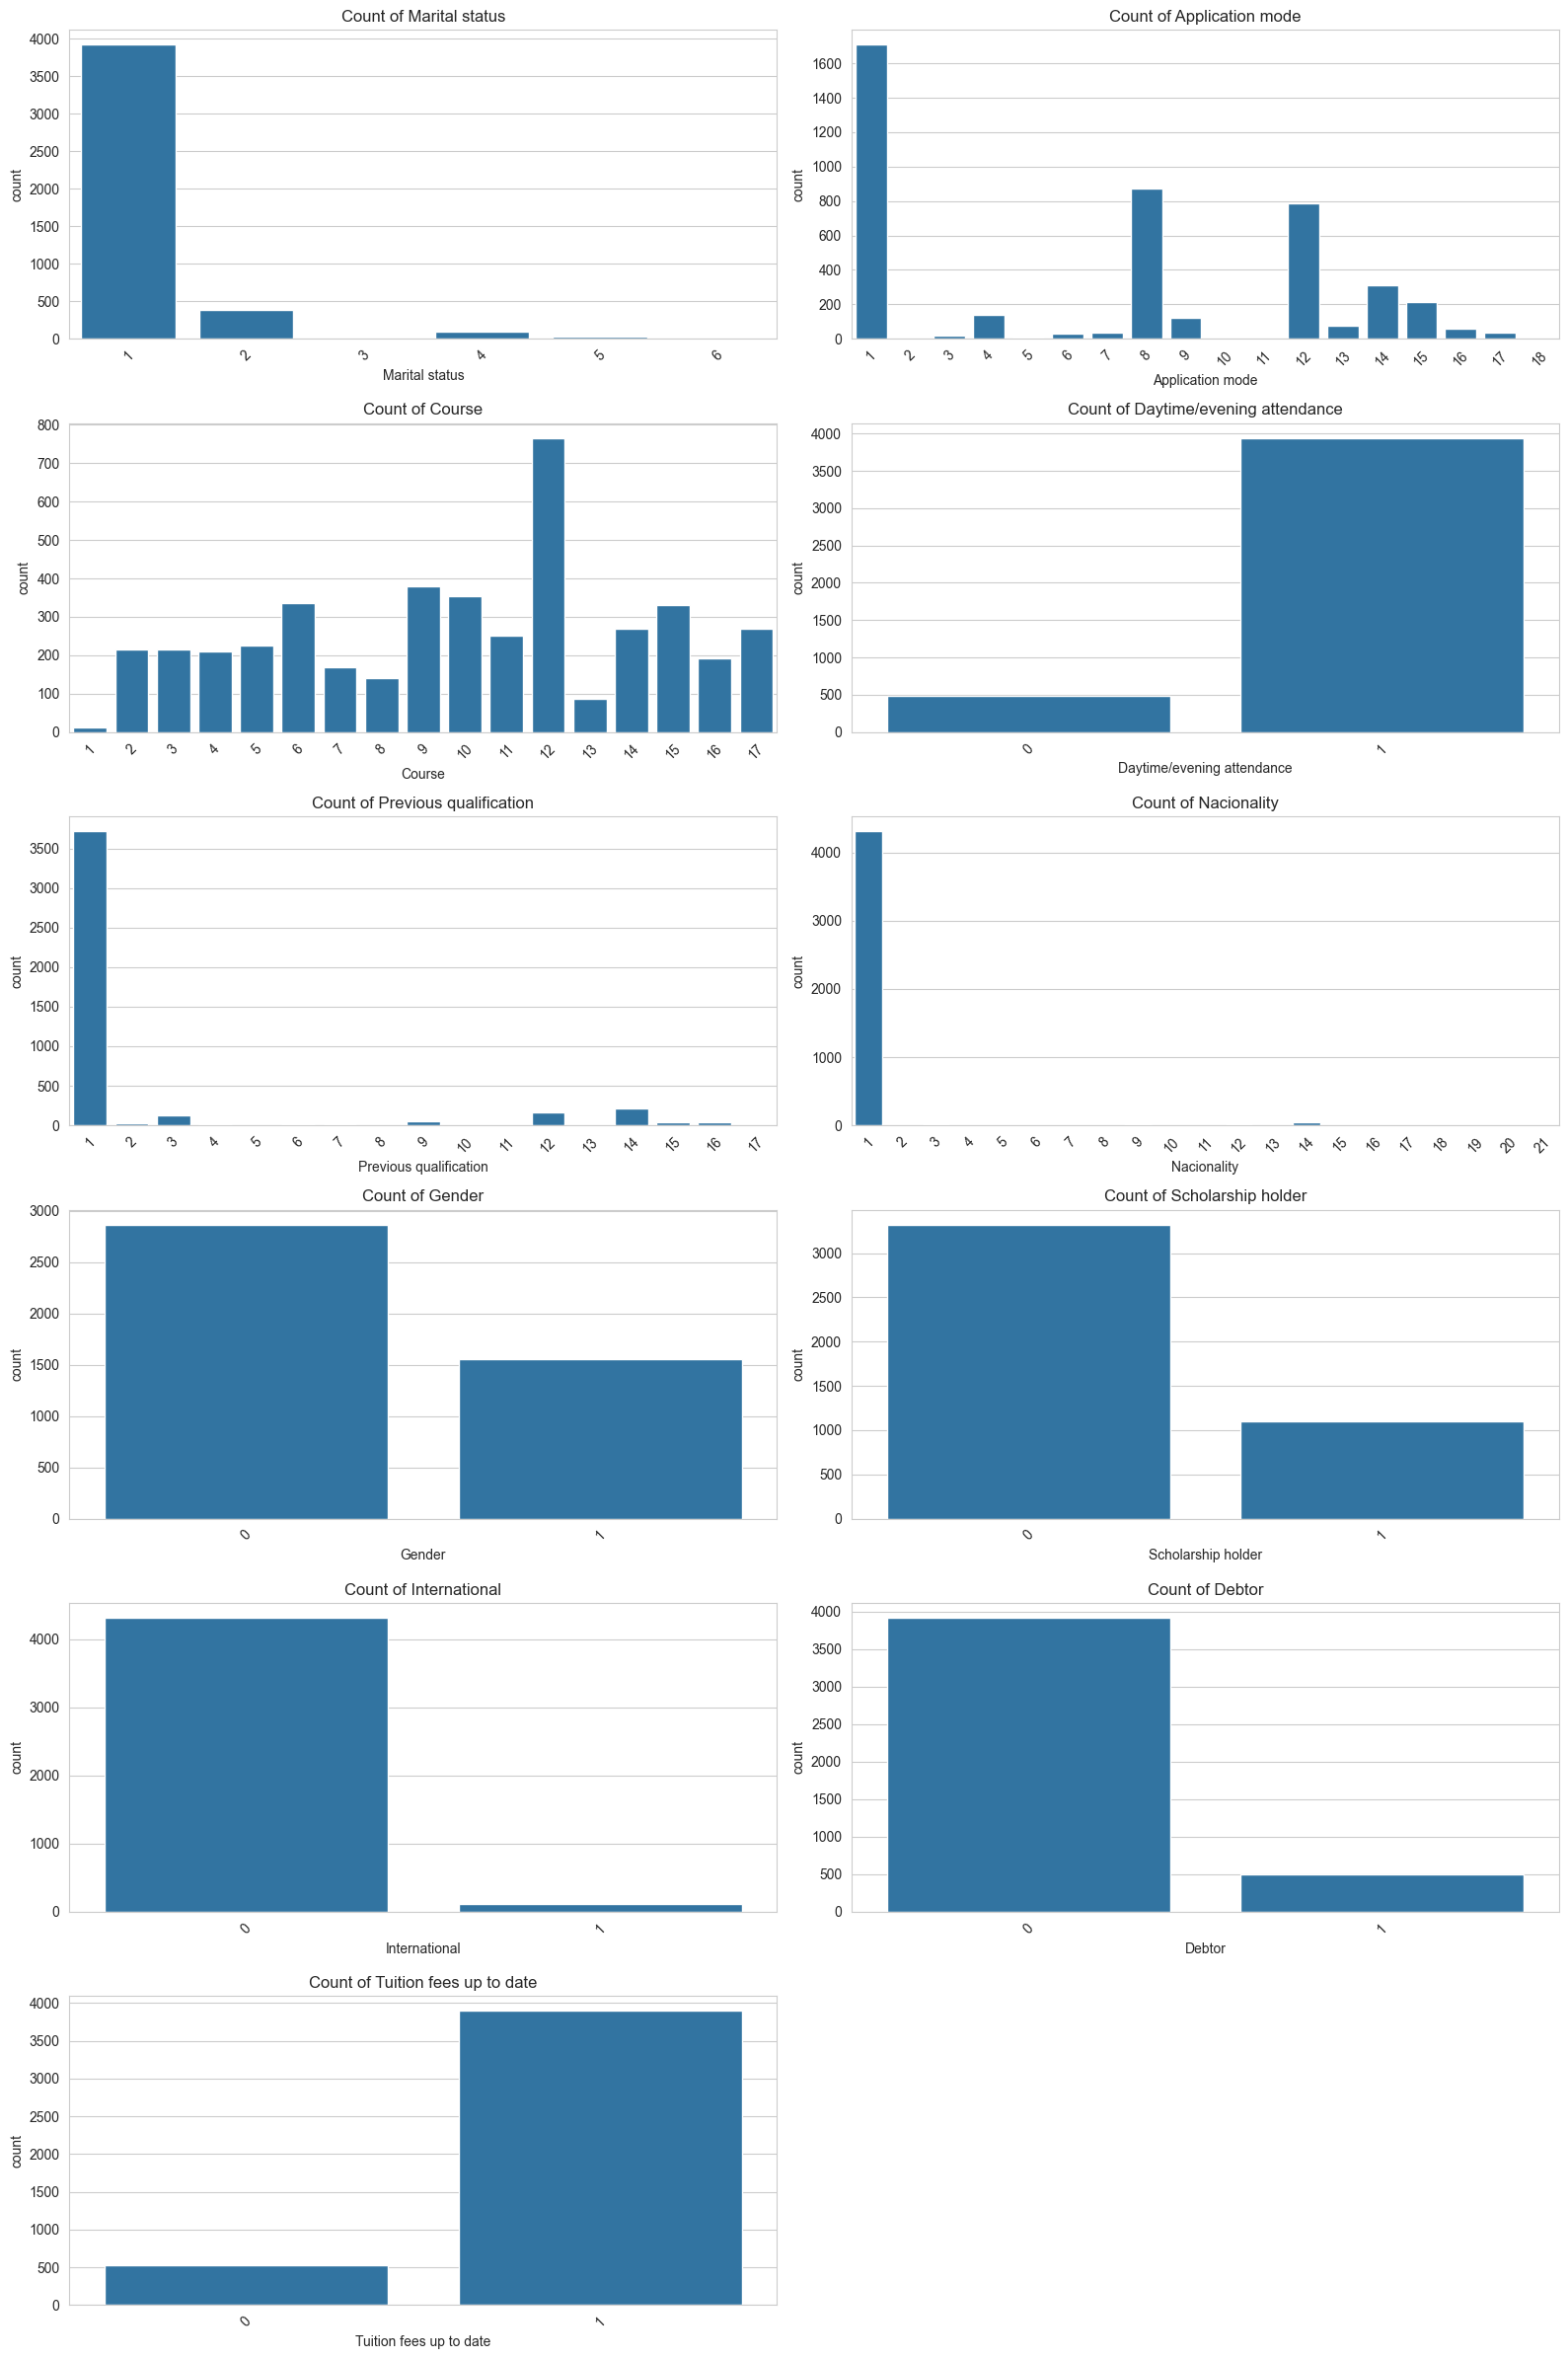

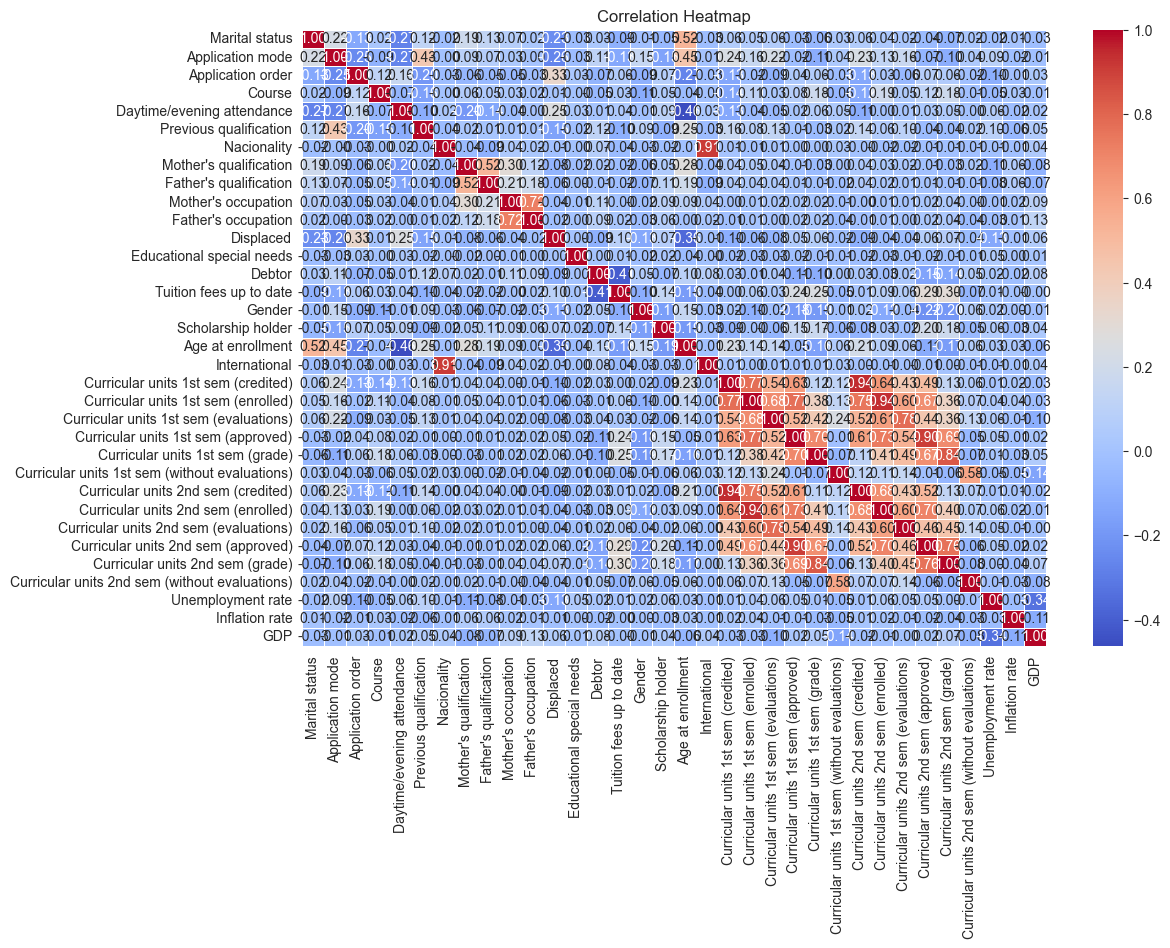

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Function to plot categorical variable counts
def plot_categorical_counts(columns, data, n_cols=2):
    n_rows = (len(columns) + n_cols - 1) // n_cols
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
    axs = axs.flatten()
    
    for i, col in enumerate(columns):
        sns.countplot(x=col, data=data, ax=axs[i])
        axs[i].set_title(f'Count of {col}')
        axs[i].tick_params(axis='x', rotation=45)
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')
    plt.tight_layout()
    plt.show()

# Function to plot correlation heatmap
def plot_correlation_heatmap(data):
    plt.figure(figsize=(12, 8))
    corr = data.corr(numeric_only=True)
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

# Select categorical columns
categorical_columns = [
    'Marital status', 'Application mode', 'Course',
    'Daytime/evening attendance', 'Previous qualification',
    'Nacionality', 'Gender', 'Scholarship holder',
    'International', 'Debtor', 'Tuition fees up to date'
]

# Plot data
plot_categorical_counts(categorical_columns, data)
plot_correlation_heatmap(data)

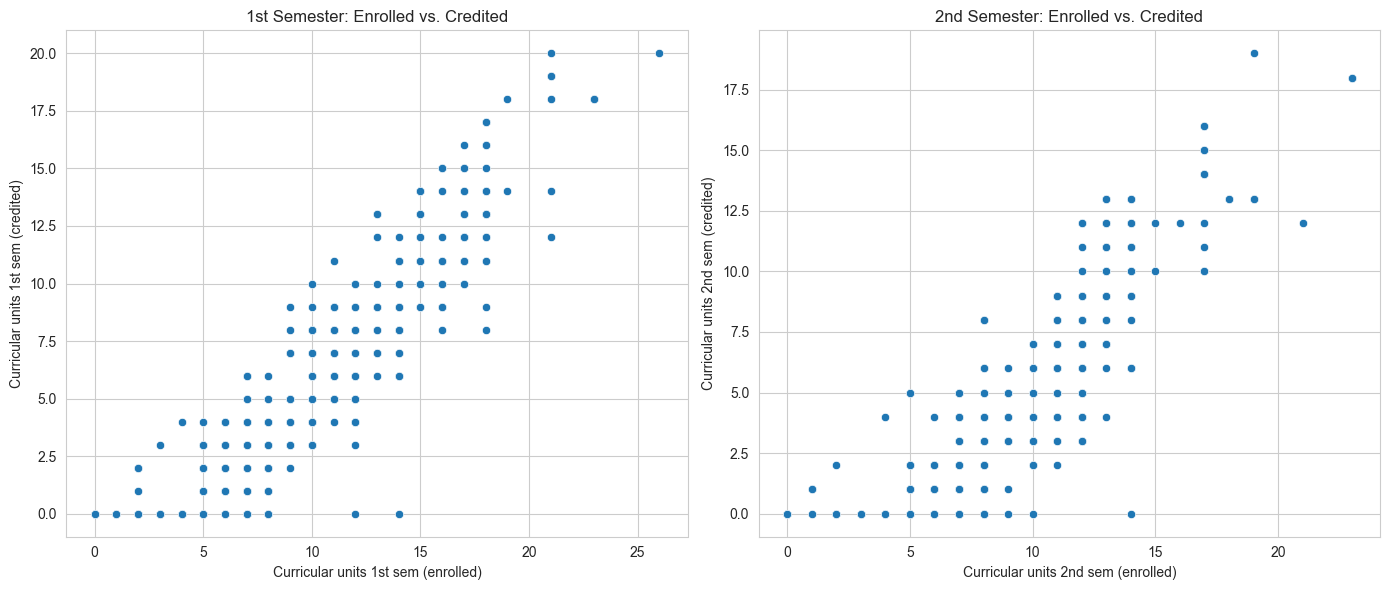

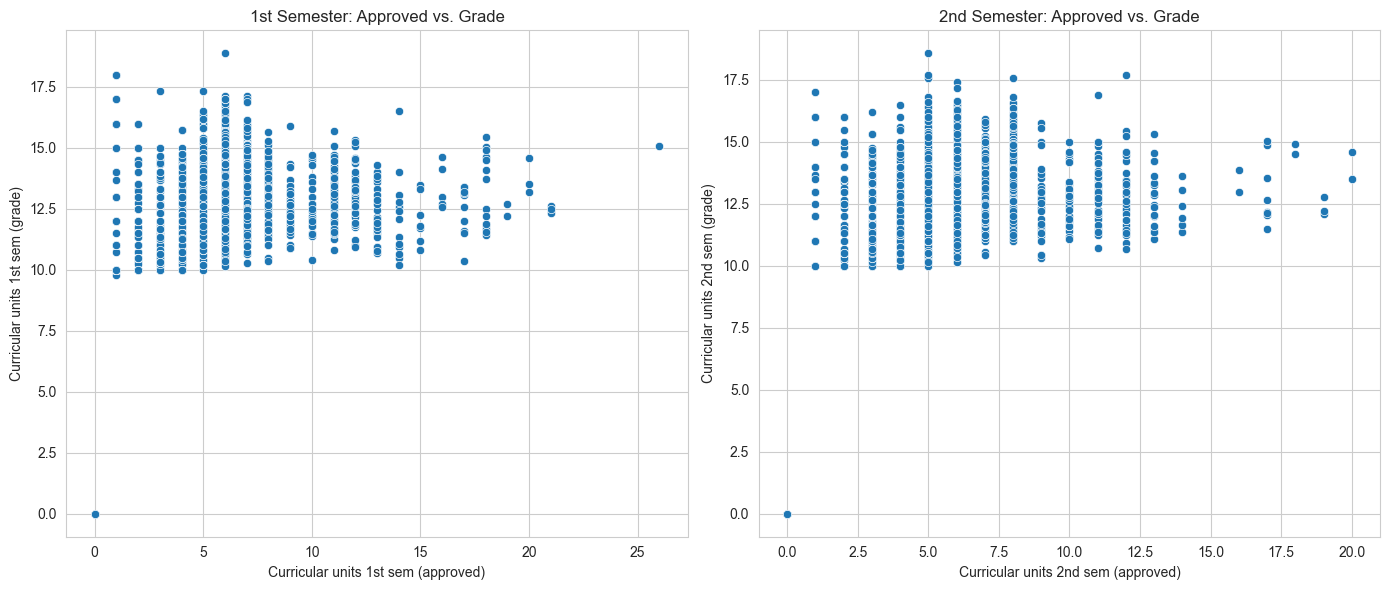

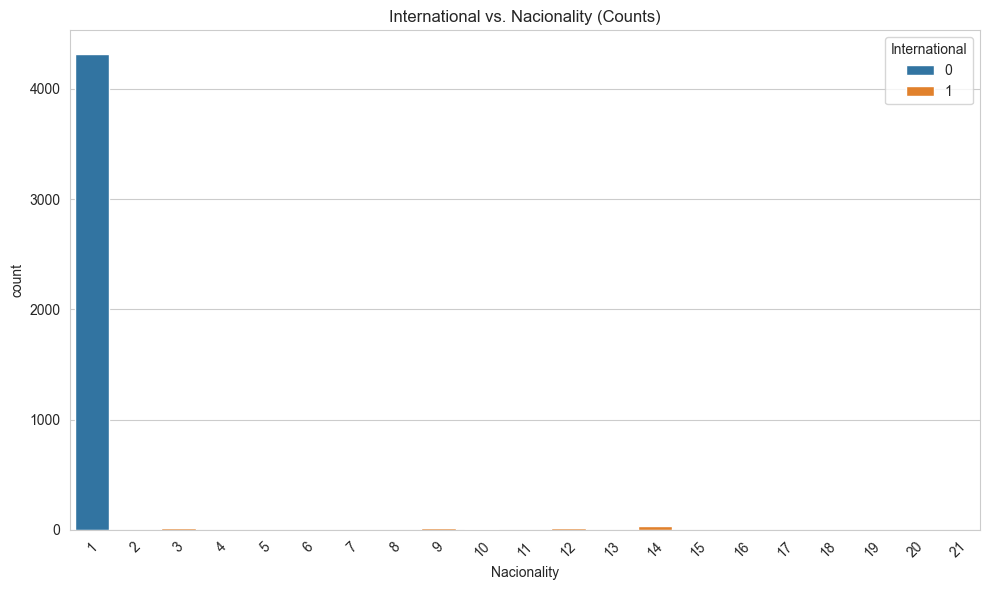

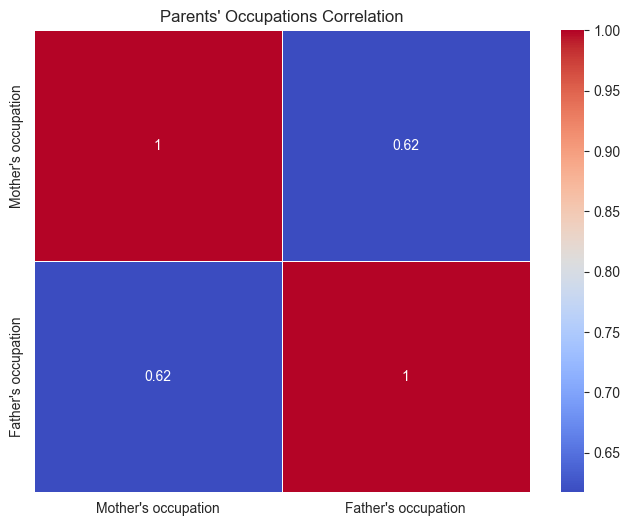

In [25]:
# Plot relationships for high-correlation pairs

# 1. Curricular Units (First and Second Semesters)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x='Curricular units 1st sem (enrolled)', y='Curricular units 1st sem (credited)', data=data, ax=axs[0])
axs[0].set_title('1st Semester: Enrolled vs. Credited')

sns.scatterplot(x='Curricular units 2nd sem (enrolled)', y='Curricular units 2nd sem (credited)', data=data, ax=axs[1])
axs[1].set_title('2nd Semester: Enrolled vs. Credited')

plt.tight_layout()
plt.show()

# 2. Approved vs. Grade
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x='Curricular units 1st sem (approved)', y='Curricular units 1st sem (grade)', data=data, ax=axs[0])
axs[0].set_title('1st Semester: Approved vs. Grade')

sns.scatterplot(x='Curricular units 2nd sem (approved)', y='Curricular units 2nd sem (grade)', data=data, ax=axs[1])
axs[1].set_title('2nd Semester: Approved vs. Grade')

plt.tight_layout()
plt.show()

# 3. International vs. Nacionality (Count Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='Nacionality', hue='International', data=data)
plt.xticks(rotation=45)
plt.title('International vs. Nacionality (Counts)')
plt.tight_layout()
plt.show()

# 4. Parents' Occupations (Heatmap)
occupation_corr = data[['Mother\'s occupation', 'Father\'s occupation']].apply(lambda x: pd.factorize(x)[0]).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(occupation_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Parents' Occupations Correlation")
plt.show()


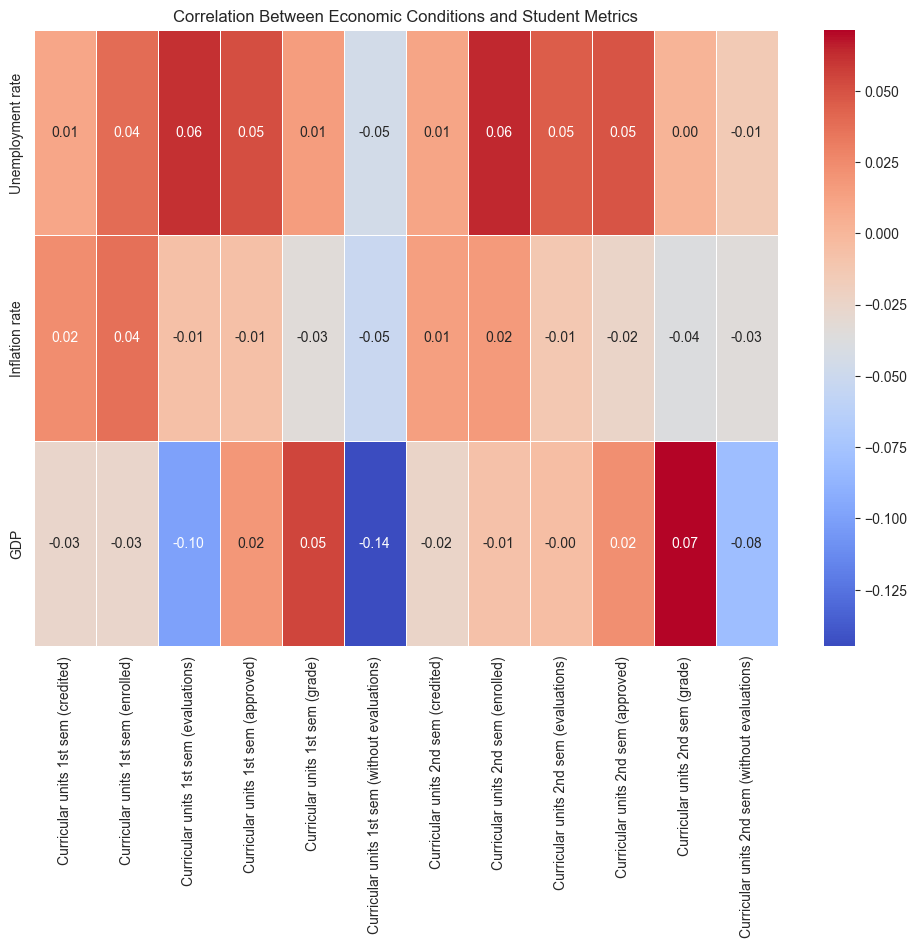

In [26]:
# Select numeric columns
numeric_columns = [
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate', 'Inflation rate', 'GDP'
]

# Correlate economic factors with student metrics
eco_corr_matrix = data[numeric_columns].corr()

# Extract correlation of economic factors only
eco_corr_with_edu = eco_corr_matrix.loc[
    ['Unemployment rate', 'Inflation rate', 'GDP'],
    [col for col in numeric_columns if 'sem' in col]
]

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(eco_corr_with_edu, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Economic Conditions and Student Metrics')
plt.show()


In [23]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Isolate target variable
target = 'Target'
X = data.drop(columns=[target])
y = data[target]

# Identify categorical and numerical features
categorical_features = [
    'Marital status', 'Application mode', 'Course', 'Daytime/evening attendance',
    'Previous qualification', 'Nacionality', 'Mother\'s qualification',
    'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation',
    'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date',
    'Gender', 'Scholarship holder', 'International'
]
numerical_features = [
    'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate', 'Inflation rate', 'GDP'
]

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first')
encoded_cat = encoder.fit_transform(X[categorical_features]).toarray()
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_features))

# Standardize numerical features
scaler = StandardScaler()
scaled_num = scaler.fit_transform(X[numerical_features])
scaled_num_df = pd.DataFrame(scaled_num, columns=numerical_features)

# Concatenate encoded and scaled features
X_prepared = pd.concat([encoded_cat_df, scaled_num_df], axis=1)

# Split the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape


((3318, 235), (1106, 235))

In [24]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100)
}

# Train and evaluate models
model_performance = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_performance[name] = {
        "accuracy": accuracy,
        "classification_report": classification_report(y_test, y_pred, output_dict=True)
    }

model_performance

{'Logistic Regression': {'accuracy': 0.7622061482820977,
  'classification_report': {'Dropout': {'precision': 0.7837837837837838,
    'recall': 0.7754010695187166,
    'f1-score': 0.7795698924731183,
    'support': 374.0},
   'Enrolled': {'precision': 0.5446428571428571,
    'recall': 0.3096446700507614,
    'f1-score': 0.3948220064724919,
    'support': 197.0},
   'Graduate': {'precision': 0.7884615384615384,
    'recall': 0.9196261682242991,
    'f1-score': 0.8490077653149266,
    'support': 535.0},
   'accuracy': 0.7622061482820977,
   'macro avg': {'precision': 0.7056293931293931,
    'recall': 0.6682239692645924,
    'f1-score': 0.6744665547535122,
    'support': 1106.0},
   'weighted avg': {'precision': 0.7434509051258599,
    'recall': 0.7622061482820977,
    'f1-score': 0.74462769394531,
    'support': 1106.0}}},
 'Support Vector Machine': {'accuracy': 0.7703435804701627,
  'classification_report': {'Dropout': {'precision': 0.8265895953757225,
    'recall': 0.7647058823529411,


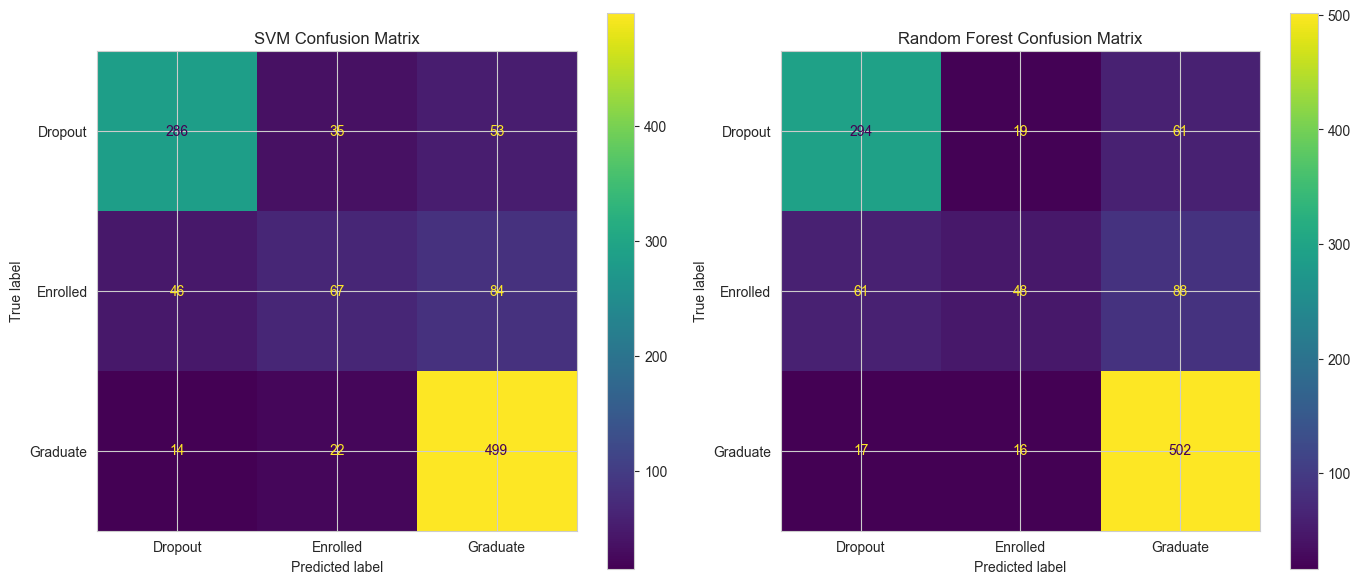

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Plot confusion matrices for SVM and Random Forest
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Support Vector Machine
svm = models['Support Vector Machine']
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=svm.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_).plot(ax=axs[0])
axs[0].set_title('SVM Confusion Matrix')

# Random Forest
rf = models['Random Forest']
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_).plot(ax=axs[1])
axs[1].set_title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()

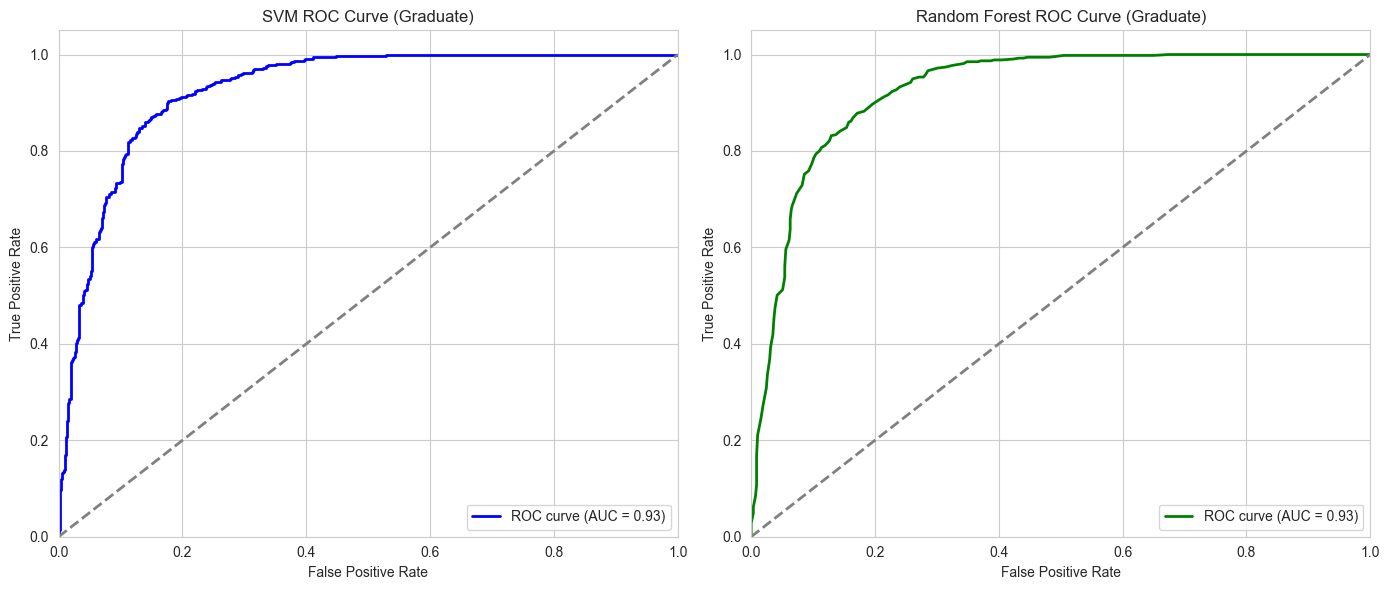

In [34]:
from sklearn.preprocessing import label_binarize

# Binarize the target labels for one-vs-rest ROC analysis
classes = ['Dropout', 'Enrolled', 'Graduate']
y_test_binarized = label_binarize(y_test, classes=classes)

# Adjust ROC Curve plotting for Random Forest and SVM
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# SVM ROC (Graduate vs. Rest)
y_proba_svm = svm.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test_binarized[:, 2], y_proba_svm[:, 2])
roc_auc_svm = auc(fpr_svm, tpr_svm)

axs[0].plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
axs[0].plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('SVM ROC Curve (Graduate)')
axs[0].legend(loc='lower right')

# Random Forest ROC (Graduate vs. Rest)
y_proba_rf = rf.predict_proba(X_test)[:, 2]
fpr_rf, tpr_rf, _ = roc_curve(y_test_binarized[:, 2], y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

axs[1].plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
axs[1].plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Random Forest ROC Curve (Graduate)')
axs[1].legend(loc='lower right')

plt.tight_layout()
plt.show()
